# Analysis


In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from scipy.stats import linregress
import requests
import json
from citipy import citipy
import time

# set latitude and longitude ranges
lat = (-90, 90)
lng = (-180, 180)

# base_url

base_url = f"http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query url 
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [2]:
# create lists to store cities and coordinates
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)

lat_lngs = zip(lats, lngs)

# use citipy to find nearest cities with coordinates 

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
    
print(len(cities))
    

622


In [3]:
# create counters and lists
city_names = []
latitudes = []
longitudes = []
country_name = []
wind_speed = []
cloudiness = []
humidity = []
temperature = []
date = []
index_counter = 0 
set_counter = 1

In [4]:
# Retrieve data for cities
for city in cities:
    try:
        
        # API Call
        response = requests.get(query_url + city).json()
        
        
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
        
        
        if index_counter > 50:
            index_counter = 0
            set_counter += 1
            city_names.append(city)
        else:
            index_counter += 1
            city_names.append(city)
            print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except (KeyError, IndexError):
        
        print("City not found. Skipping...")


Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | sosnovo-ozerskoye
Processing Record 3 of Set 1 | bafq
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | estelle
City not found. Skipping...
Processing Record 6 of Set 1 | sheffield
City not found. Skipping...
Processing Record 7 of Set 1 | atar
Processing Record 8 of Set 1 | buchanan
Processing Record 9 of Set 1 | aswan
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | padang
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | nicolas bravo
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | daru
Processing Record 20 of Set 1 | carthage
Processing Record 21 of Set 1 | seoul
Processing Record 22 of Set 1 | kruisfontein
Processing Record 23 of Set 1 | ancud
Processing Reco

Processing Record 39 of Set 4 | heilbron
City not found. Skipping...
Processing Record 40 of Set 4 | atasu
Processing Record 41 of Set 4 | rio verde de mato grosso
Processing Record 42 of Set 4 | big spring
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | mogadishu
Processing Record 47 of Set 4 | chiredzi
Processing Record 48 of Set 4 | matara
Processing Record 49 of Set 4 | ambunti
Processing Record 50 of Set 4 | novikovo
Processing Record 51 of Set 4 | tessalit
Processing Record 1 of Set 5 | hervey bay
Processing Record 2 of Set 5 | pangody
Processing Record 3 of Set 5 | svetlaya
Processing Record 4 of Set 5 | bonthe
Processing Record 5 of Set 5 | saint anthony
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | darovskoy
City not found. Skipping...
Processing Record 8 of Set 5 | hermanus
Processing Record 9 of Set 5 | rumoi
Processing Record 10 of Set 5 | nami

Processing Record 21 of Set 8 | grindavik
Processing Record 22 of Set 8 | weiser
Processing Record 23 of Set 8 | grand baie
Processing Record 24 of Set 8 | wahpeton
Processing Record 25 of Set 8 | carbonear
Processing Record 26 of Set 8 | jiaozuo
Processing Record 27 of Set 8 | college
Processing Record 28 of Set 8 | rurrenabaque
Processing Record 29 of Set 8 | bardiyah
Processing Record 30 of Set 8 | aykhal
Processing Record 31 of Set 8 | ustka
Processing Record 32 of Set 8 | arman
Processing Record 33 of Set 8 | krasnyy kut
Processing Record 34 of Set 8 | ovalle
Processing Record 35 of Set 8 | pitea
Processing Record 36 of Set 8 | conceicao do araguaia
City not found. Skipping...
Processing Record 37 of Set 8 | kaseda
Processing Record 38 of Set 8 | sakakah
Processing Record 39 of Set 8 | gobabis
Processing Record 40 of Set 8 | turcoaia
Processing Record 41 of Set 8 | sept-iles
Processing Record 42 of Set 8 | natal
Processing Record 43 of Set 8 | kamiiso
Processing Record 44 of Set 8

In [5]:
weather_df = pd.DataFrame({"City": city_names, "Lat": latitudes, "Lng": longitudes,
                          "Country": country_name, "Wind": wind_speed, "Cloud": cloudiness,
                          "Humidity": humidity, "Max Temp.": temperature, "Date": date})
weather_df.head()

,City,Lat,Lng,Country,Wind,Cloud,Humidity,Max Temp.,Date
0,vila velha,-20.33,-40.29,BR,3.36,90,94,73.40,1606097843
1,sosnovo-ozerskoye,52.52,111.54,RU,12.88,100,95,17.08,1606097843
2,bafq,31.61,55.41,IR,1.48,10,86,43.97,1606097844
3,mataura,-46.19,168.86,NZ,3.00,31,58,59.00,1606097679
4,estelle,29.85,-90.11,US,7.25,0,79,69.01,1606097844


In [6]:
# output as csv
weather_df.to_csv("output_data/weather_data.csv")

In [7]:
# describe dataframe
weather_df.describe()

,Lat,Lng,Wind,Cloud,Humidity,Max Temp.,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.121538,17.617552,7.730927,55.557692,77.482517,52.578234,1.606098e+09
std,33.882887,92.457949,5.585713,40.182445,17.680509,25.541006,8.159501e+01
min,-54.800000,-179.170000,0.180000,0.000000,9.000000,-15.680000,1.606097e+09
25%,-8.797500,-63.642500,3.360000,8.750000,70.000000,32.000000,1.606098e+09
50%,26.565000,22.770000,6.575000,73.500000,81.000000,58.440000,1.606098e+09
75%,49.027500,101.895000,11.025000,95.000000,91.000000,74.250000,1.606098e+09
max,78.220000,178.420000,38.480000,100.000000,100.000000,100.400000,1.606098e+09


In [8]:
weather_df["Humidity"].max()
# no outliers

100

In [9]:
# dropping humidity outliers by index 

quartiles = weather_df["Humidity"].quantile([.25, .5, .75])

lower_q = quartiles[.25]
upper_q = quartiles[.75]
iqr = upper_q - lower_q

upper_bound = upper_q + (1.5*iqr)
lower_bound = lower_q - (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below 38.5 could be outliers.
Values above 122.5 could be outliers.


In [10]:
clean_city_data = pd.DataFrame(weather_df[weather_df.Humidity >= 32.5])
clean_city_data.count()

City         555
Lat          555
Lng          555
Country      555
Wind         555
Cloud        555
Humidity     555
Max Temp.    555
Date         555
dtype: int64

In [11]:
clean_city_data.to_csv("output_data/clean_city_data.csv")

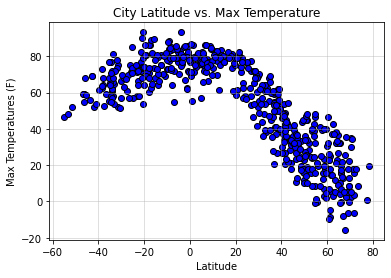

In [12]:
# Latitude vs. Max Temperature

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp."], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(alpha=0.5)
plt.savefig("Images/lat_temps.png")

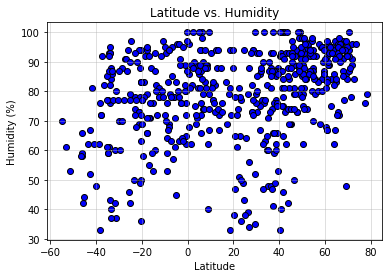

In [13]:
# Latitude vs. Humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black", facecolors= "blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

plt.grid(alpha=0.5)
plt.savefig("Images/lat_humidity.png")

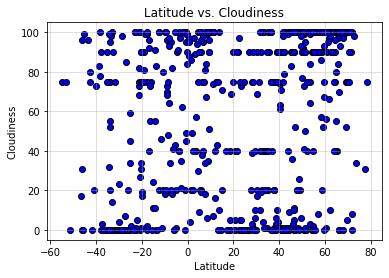

In [14]:
# Latitude vs Cloudiness

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloud"], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid(alpha=0.5)
plt.savefig("Images/Lat_Cloud.png")

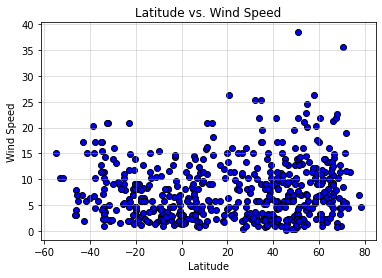

In [15]:
# Latitude vs. Wind Speed

plt.scatter(clean_city_data["Lat"], clean_city_data["Wind"], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid(alpha=0.5)
plt.savefig("Images/Lat_Wind.png")

The rvalue is: -0.8869526852595269


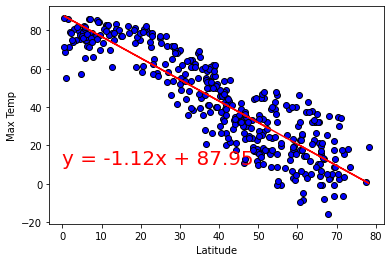

In [16]:
# Liner Regression - Max Temp vs. Latitude 
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(0,10), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_temp_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.6293129575030134


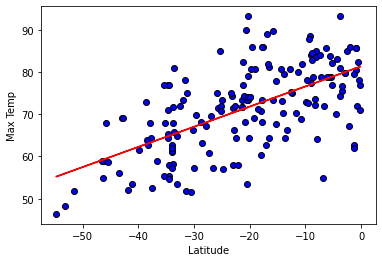

In [17]:
# Liner Regression - Max Temp vs. Latitude 
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-40,40), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_temp_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.25816210567683634


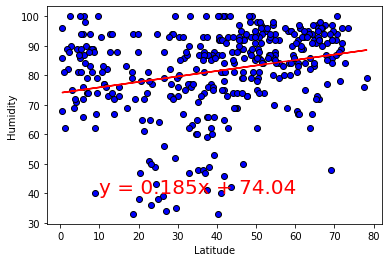

In [18]:
# Northern Hempisphere Latitude vs. Humidity 
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(10,40), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_Humidity_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.28288034053082894


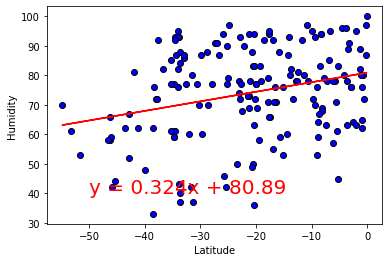

In [19]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,40), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_Humidity_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.20011255427626795


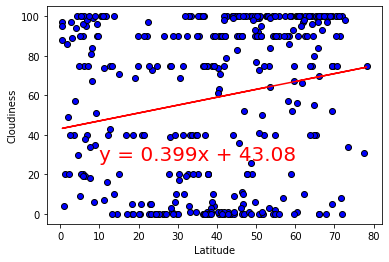

In [20]:
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(10,27), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_cloud_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.20042226678836159


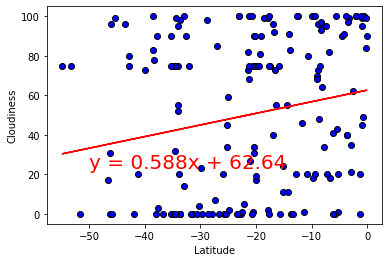

In [21]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,23), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_cloud_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.13389051759874906


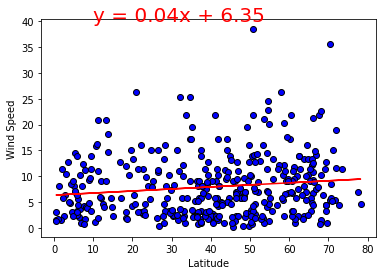

In [22]:
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,40), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_wind_regress.png")
print(f"The rvalue is: {rvalue}")

The rvalue is: -0.29393875879182746


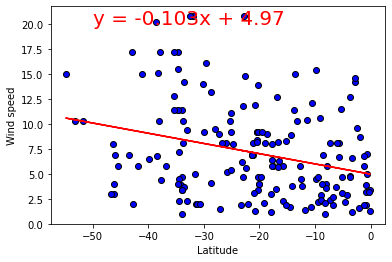

In [23]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.annotate(line_eq,(-50,20), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_wind_regress.png")
print(f"The rvalue is: {rvalue}")